# Assessment for Computer Infrastrucure Module

## Problem 1: Data from yfinance

Using [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function that downloads all hourly data for the previous five days for the five FAANG stocks:
- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

In [ ]:
# Import modules

# Import os for file handling
import os

# Import pandas
import pandas as pd

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Dates and times
import datetime as dt

# Import yFinance (Yahoo Finance)    
import yfinance as yf

### Download historical data for the five companies

In [2]:
# Get data for the five companies (multiple tickers at once), using 
# df to persist the data frame
# https://ranaroussi.github.io/yfinance/

def get_data():
    # Define the FAANG stocks
    faang_stocks = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

    # Get hourly data for the last 5 days
    data = yf.download(tickers=faang_stocks, period='5d', interval='1h')
    
    return data

# Get the data
df = get_data()

# Print the first few rows of the dataframe
print(df.head())

/tmp/ipykernel_25602/1442533312.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=faang_stocks, period='5d', interval='1h')


[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   
2025-12-05 17:30:00+00:00  279.440002  229.839996  321.660004  672.000000   
2025-12-05 18:30:00+00:00  279.233795  229.675003  321.075012  672.539978   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.750000  

In [3]:
# Display the columns of the dataframe
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [4]:
# Show the index
#' https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
df.index

DatetimeIndex(['2025-12-05 14:30:00+00:00', '2025-12-05 15:30:00+00:00',
               '2025-12-05 16:30:00+00:00', '2025-12-05 17:30:00+00:00',
               '2025-12-05 18:30:00+00:00', '2025-12-05 19:30:00+00:00',
               '2025-12-05 20:30:00+00:00', '2025-12-08 14:30:00+00:00',
               '2025-12-08 15:30:00+00:00', '2025-12-08 16:30:00+00:00',
               '2025-12-08 17:30:00+00:00', '2025-12-08 18:30:00+00:00',
               '2025-12-08 19:30:00+00:00', '2025-12-08 20:30:00+00:00',
               '2025-12-09 14:30:00+00:00', '2025-12-09 15:30:00+00:00',
               '2025-12-09 16:30:00+00:00', '2025-12-09 17:30:00+00:00',
               '2025-12-09 18:30:00+00:00', '2025-12-09 19:30:00+00:00',
               '2025-12-09 20:30:00+00:00', '2025-12-10 14:30:00+00:00',
               '2025-12-10 15:30:00+00:00', '2025-12-10 16:30:00+00:00',
               '2025-12-10 17:30:00+00:00', '2025-12-10 18:30:00+00:00',
               '2025-12-10 19:30:00+00:00', '2025-1

In [5]:
# Find current data and time
# https://docs.python.org/3/library/datetime.html
now = dt.datetime.now()

# Show
now

datetime.datetime(2025, 12, 11, 15, 47, 53, 623798)

In [6]:
# Fornmat data and time
# https://docs.python.org/3/library/datetime.html

now.strftime("%Y%m%d-%H%M%S")

'20251211-154753'

In [7]:
# Save data as CSV, changing the file name to include date and time
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

df.to_csv("data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv")

## Problem 2


Plot "close" prices for each of the five stocks. 

In [8]:

# Examine data types in the 'Close' columns before plotting
df['Close'].dtypes

Ticker
AAPL    float64
AMZN    float64
GOOG    float64
META    float64
NFLX    float64
dtype: object

In [9]:
# Check the columns
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])


<Axes: xlabel='Datetime'>

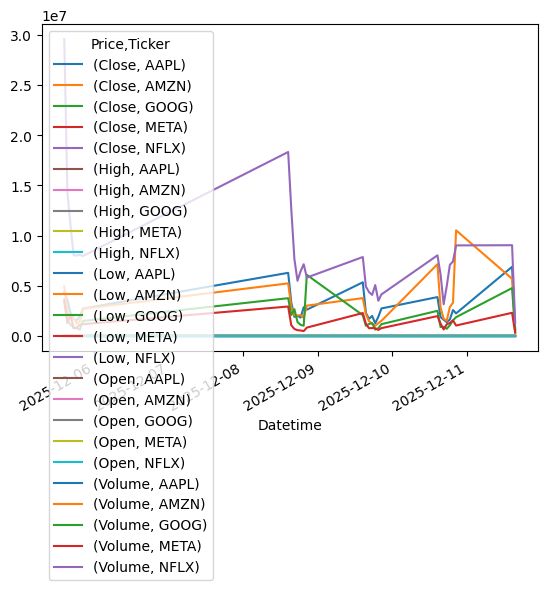

In [10]:
# Call df.plot() to have a look, first
df.plot()

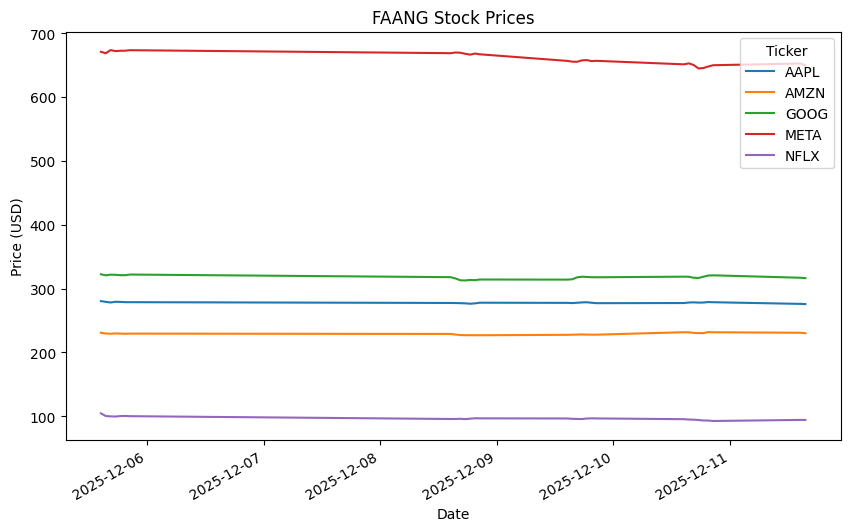

In [11]:
# Creat figure and axes 
fig, ax = plt.subplots()

# Plot closing prices for the 5 stocks
df['Close'].plot(ax=ax, title='FAANG Stock Prices', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Price (USD)')   

# Current date and time.
now = dt.datetime.now()

# File name.
filename = "plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save figure.
fig.savefig(filename, dpi=300)

## END